In [30]:
import numpy.testing as nt

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import numpy.linalg as LA

In [33]:
import os

In [34]:
from scipy.io import loadmat
output = loadmat(os.path.join('..','ssnmf','data','output.mat'))

In [35]:
# testing no sparsity, no smoothnes, 1 iteration
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

print(LA.norm(output['V'] - (model.W@model.H)))

97.55296778898247


In [36]:
# testing the initial distance
nt.assert_almost_equal(LA.norm(output['V'] - (output['init_W']@output['init_H'])),213.432630275)

In [37]:
# compare cost after 1 iteration
nt.assert_almost_equal(model.cost, 9516.581524438)

In [38]:
# testing no sparsity, no smoothness, 200 iterations
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=200, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],3636.162716116)

In [39]:
# testing sparsity, 1 iteration
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=0, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],4750.738752595)

In [40]:
# testing smoothness, 1 iteration
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=1, sparsity=0, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')


print(LA.norm(model.W))
print(LA.norm(model.H))

nt.assert_almost_equal(LA.norm(model.W),4.7809,decimal=4)
nt.assert_almost_equal(LA.norm(model.H),39.6015,decimal=4)
nt.assert_almost_equal(model.cost[-1],6667.921143908)

4.780944415814664
39.60155523767054


In [41]:
# testing sparsity and smoothness, 1 iteration
model = ssnmf.smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')
nt.assert_almost_equal(model.cost[-1],6715.167611171)


In [42]:
# testing sparsity and smoothness, 200 iterations
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

nt.assert_almost_equal(model.cost[-1],3909.6946, decimal=4)

In [43]:
# testing sparsity and smoothness, 200 iterations
import ssnmf
model = ssnmf.smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.1, betaH=0.1)
model.fit(output['V'], W=output['init_W'], H=output['init_H'], init='custom')

nt.assert_almost_equal(model.cost[-1],3893.69665, decimal=4)

**Testing on the sonar dataset.**

In [44]:
from scipy.io import loadmat
output = loadmat(os.path.join('..','ssnmf','data','sonar_output.mat'))

In [45]:
init_W = output['params_all']['init_W'][0,0]
init_H = output['params_all']['init_H'][0,0]
max_iter = output['params_all']['max_iter'][0,0]

2516.922817573137
CPU times: user 1.6 s, sys: 345 ms, total: 1.95 s
Wall time: 509 ms


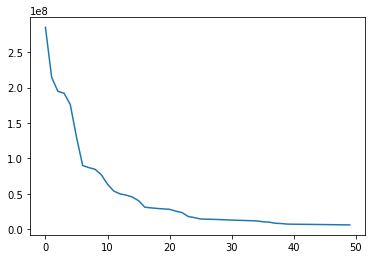

In [46]:
%%time
# testing no sparsity, no smoothnes, 1 iteration
import ssnmf
model = ssnmf.smoothNMF(r=3, max_iter=50, betaW=0, betaH=0)
model.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

In [47]:
W_reshaped = model.W.reshape(3, 144, 37, 3)

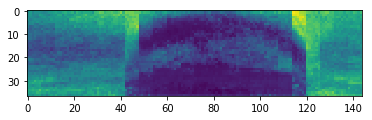

In [48]:
plt.imshow(W_reshaped[0,:,:,2].T)

In [49]:
# seems rank is 3 instead of 5 ???

In [50]:
output['params_all'][0]

array([(array([[3]], dtype=uint8), array([[50]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0.01]]), array([[0.81472369, 0.89638499, 0.9765793 ],
       [0.90579194, 0.82233698, 0.64965081],
       [0.12698682, 0.88278375, 0.94581752],
       ...,
       [0.74448884, 0.53463759, 0.12153136],
       [0.21285622, 0.70127087, 0.9951019 ],
       [0.10012246, 0.33829382, 0.32230971]]), array([[0.61255865, 0.52494092, 0.85378614, 0.57182458, 0.52551211,
        0.90362677, 0.14140459, 0.23764004, 0.33325914, 0.07234922,
        0.18453061, 0.88927026, 0.89008589, 0.77351042, 0.28932945,
        0.2436337 , 0.81959437, 0.35335566, 0.65919615, 0.87309013,
        0.69143526, 0.27778146, 0.50337604, 0.13789708, 0.72801385,
        0.32615465, 0.20726351, 0.46598106, 0.33208926, 0.20162799,
        0.72066244, 0.06452473, 0.52438631, 0.49361092, 0.43295562,
        0.66192381, 0.46155452, 0.99513164, 0.92982287, 0.78726828,
        0.12549798, 0.54263493, 0.0771

In [51]:
print(LA.norm(output['W'] - model.W))
print(LA.norm(output['H'] - model.H))

1.2445425945401341e-12
3.922246836568823e-14


In [52]:
# output['params_all']['max_iter'][0,0]

In [53]:
# display projection on first component

2516.922817573137


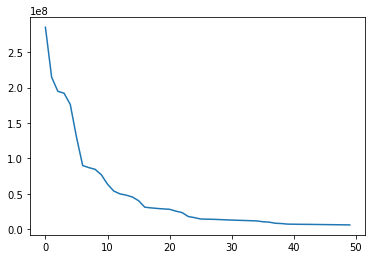

In [54]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations
betaW = 1.001
betaH = 1.001
model = ssnmf.smoothNMF(r=3, max_iter=50, betaW=1.001, betaH=1.001)
model.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

1452.201699523269


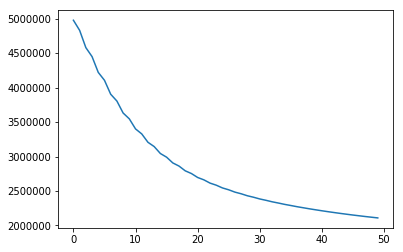

In [63]:
# testing 0.1 sparsity, 0.1 smoothnes, 1000 iterations
betaW = 1.001
betaH = 1.001
model_random = ssnmf.smoothNMF(r=3, max_iter=1000, betaW=1.001, betaH=1.001)
model_random.fit(output['LL'], W=init_W, H=init_H, init='custom')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

1452.201699523269


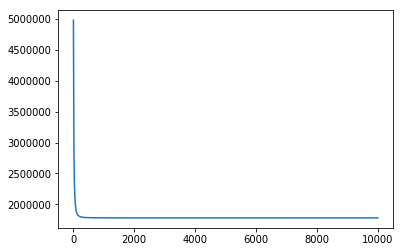

In [74]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvd = ssnmf.smoothNMF(r=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvd.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvd.cost)

1452.201699523269


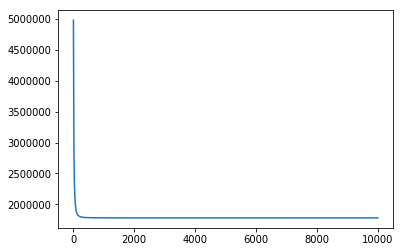

In [75]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvd = ssnmf.smoothNMF(r=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvd.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvd.cost)

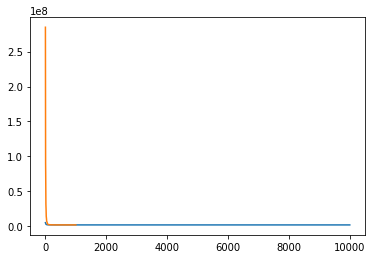

In [76]:
plt.plot(model_nndsvd.cost)
plt.plot(model_random.cost)

1452.201699523269


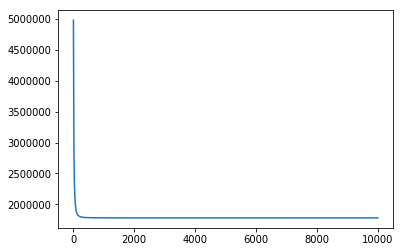

In [83]:
# testing 0.1 sparsity, 0.1 smoothnes, 50 iterations, svd initialization
betaW = 1.001
betaH = 1.001
model_nndsvda = ssnmf.smoothNMF(r=3, max_iter=10000, betaW=1.001, betaH=1.001)
model_nndsvda.fit(output['LL'], W=init_W, H=init_H, init='nndsvd')

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model_nndsvda.cost)

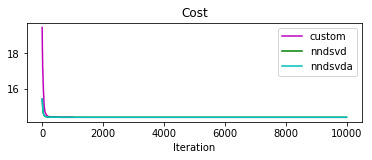

In [94]:
import numpy as np
plt.subplot(2, 1, 1)
plt.plot(np.log(model_random.cost), 'm')
plt.plot(np.log(model_nndsvd.cost), 'g')
plt.plot(np.log(model_nndsvda.cost), 'c')
plt.title('Cost')
plt.xlabel('Iteration')
plt.legend(['custom','nndsvd','nndsvda'])

In [96]:
print(model_random.cost[-1]/len(output['LL'].ravel()))
print(model_nndsvd.cost[-1]/len(output['LL'].ravel()))
print(model_nndsvda.cost[-1]/len(output['LL'].ravel()))


1.7996247547562652
1.7983025809972022
1.7983025809972022
